Seeding for Reproducibility

In [1]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

Importing the Dependencies

In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

**Data Curation**

upload the kaggle.jsonfile

In [3]:
!pip install kaggle

In [4]:
 kaggle_credentials = json.load(open("kaggle.json"))

In [5]:
#set up kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentials['username']
os.environ['KAGGLE_KEY'] = kaggle_credentials['key']

In [6]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.04G/2.04G [01:02<00:00, 40.3MB/s]
100% 2.04G/2.04G [01:02<00:00, 35.3MB/s]


In [7]:
!ls

kaggle.json  plantvillage-dataset.zip  sample_data


In [8]:
#unzip the downloaded dataset
with ZipFile('plantvillage-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [9]:
print(os.listdir('plantvillage dataset'))

print(len(os.listdir('plantvillage dataset/segmented')))
print(os.listdir('plantvillage dataset/segmented')[:5])

print(len(os.listdir('plantvillage dataset/color')))
print(os.listdir('plantvillage dataset/color')[:5])

print(len(os.listdir('plantvillage dataset/grayscale')))
print(os.listdir('plantvillage dataset/grayscale')[:5])

['segmented', 'color', 'grayscale']
38
['Pepper,_bell___Bacterial_spot', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Pepper,_bell___healthy', 'Peach___healthy', 'Tomato___Early_blight']
38
['Pepper,_bell___Bacterial_spot', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Pepper,_bell___healthy', 'Peach___healthy', 'Tomato___Early_blight']
38
['Pepper,_bell___Bacterial_spot', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Pepper,_bell___healthy', 'Peach___healthy', 'Tomato___Early_blight']


In [10]:
print(len(os.listdir('plantvillage dataset/color/Grape___healthy')))
print(os.listdir('plantvillage dataset/color/Grape___healthy')[:5])

423
['b3a5441e-385d-444e-bf4b-3c7d3cdf36e6___Mt.N.V_HL 9101.JPG', 'c1b04456-5136-4594-9c8b-cfb9bfc7404f___Mt.N.V_HL 9001.JPG', '0163a6aa-fbf8-47c5-965f-59b6efe8bfe5___Mt.N.V_HL 6103.JPG', 'feb2cf1a-1903-4fb8-bc99-4b399346fef0___Mt.N.V_HL 6135.JPG', 'fa8cd79e-82e1-4dda-9a82-6ce207f2b557___Mt.N.V_HL 9097.JPG']


In [11]:
#Dataset Path
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


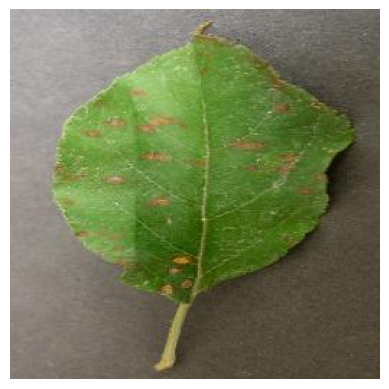

In [12]:
 image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

 #Read the image
 img = mpimg.imread(image_path)

 print(img.shape)
 #Display the image
 plt.imshow(img)
 plt.axis('off') #Turn off axis numbers
 plt.show()

In [13]:
#Image parameters
img_size = 224
batch_size = 32

In [14]:
#Image data Generators
data_gen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2 #use 20% for data validation
)

In [15]:
#Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size, img_size),
    batch_size = batch_size,
    subset = 'training',
    class_mode = 'categorical'
)

Found 43456 images belonging to 38 classes.


In [16]:
#Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size, img_size),
    batch_size = batch_size,
    subset = 'validation',
    class_mode = 'categorical'
)

Found 10849 images belonging to 38 classes.


Model Defination

In [17]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation = 'relu'))
model.add(layers.Dense(train_generator.num_classes, activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
#model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
#compile the model
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

Model Training

In [20]:
#Training the model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,    #number of steps per epoch
    epochs = 5,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size  #validationsteps
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 124s 85ms/step - accuracy: 0.6049 - loss: 1.8643 - val_accuracy: 0.8469 - val_loss: 0.4936
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1s 848us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 1.1456
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 102s 74ms/step - accuracy: 0.9218 - loss: 0.2419 - val_accuracy: 0.8547 - val_loss: 0.4783
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 11us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 5.9605e-07
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 138s 72ms/step - accuracy: 0.9685 - loss: 0.0967 - val_accuracy: 0.8694 - val_loss: 0.5013


Model Evaluation

In [21]:
#Model evaluation
print("Evaluating Model")
val_loss, val_acc = model.evaluate(validation_generator,steps = validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

Evaluating Model
339/339 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.8677 - loss: 0.4925
Validation Accuracy: 86.95%


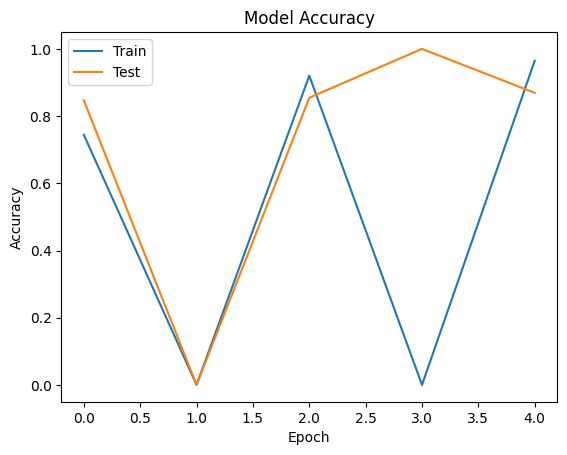

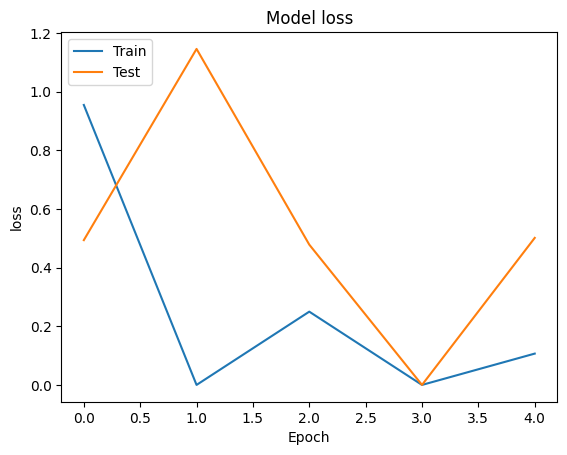

In [22]:
#plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#plot training and validation loss values
#plot training and validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Bulding a Predictive system

In [23]:
#Function to load and preprocess the image using Pillow
def load_and_preprocess_image(image_path , target_size = (224,224)):
    #load the image
    img = Image.open(image_path)
    #Resize the image
    img = img.resize(target_size)
    #convert the image to a numpy array
    img_array = np.array(img)
    #Add batch dimension
    img_array = np.expand_dims(img_array, axis = 0)
    #Normalize the image values to [0,1]
    img_array = img_array.astype('float32') / 255.0
    return img_array

#Function to predict class of Image
def predict_image_class(model, image_path, class_indicies):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions , axis = 1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [24]:
#Create a mapping from class indicies to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [25]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [26]:
#saving the class name as Json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [27]:
#Example usage
#image_path = '/content/0090d05d-d797-4c99-abd4-3b9cb323a5fd___JR_FrgE.S 8727.JPG'
#image_path = '/content/008c85d0-a954-4127-bd26-861dc8a1e6ff___RS_HL 2431.JPG'
#image_path = '/content/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG'
predicted_class_name = predict_image_class(model, image_path, class_indices)

#otpit the result
print(f"Predicted class name: {predicted_class_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
Predicted class name: Apple___Cedar_apple_rust


Save the model to Google drive or local

In [29]:
model.save("/content/drive/MyDrive/Colab Notebooks/Leaf/Leaf Disease Detection.h5")